In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

!pip install xgboost

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [ ]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop\week6_hw


In [ ]:
df=pd.read_csv('loan_prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df.columns=[i.lower().strip().replace(' ','_') for i in df.columns]
df.head(2)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


Text(0.5, 1.0, 'Loan status')

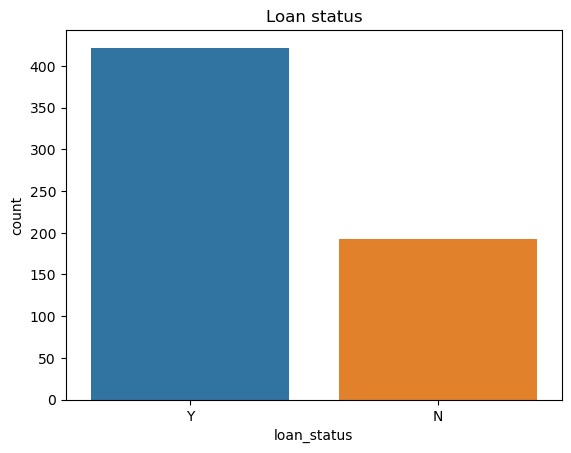

In [ ]:
sns.countplot(x=df['loan_status'])
plt.title('Loan status')

In [ ]:
df['credit_history'].value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

Text(0.5, 1.0, 'Credit History')

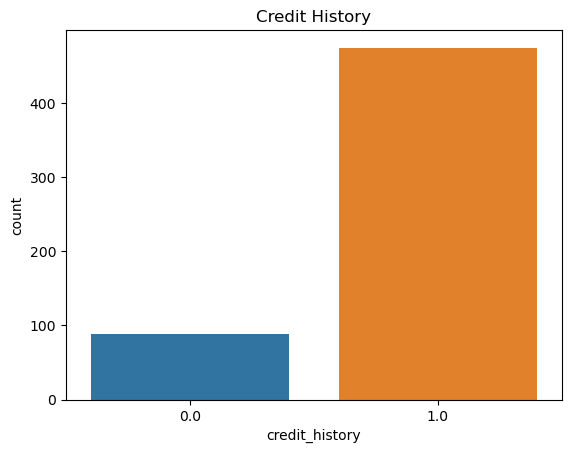

In [ ]:
sns.countplot(x=df['credit_history'])
plt.title('Credit History')

In [ ]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [ ]:
df.drop(['loan_id'],axis=1,inplace=True)

In [ ]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df.shape

(614, 12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['loan_status']=label_encoder.fit_transform(df['loan_status'])

In [ ]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [ ]:
df[['gender','married','dependents','property_area','education','self_employed']]=df[['gender','married','property_area','dependents','education','self_employed']].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             601 non-null    object 
 1   married            611 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      582 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         592 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      599 non-null    object 
 11  loan_status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 60.0+ KB


In [ ]:
columns_to_exclude = ['loan_status']
df_encoded = pd.get_dummies(df.drop(columns_to_exclude, axis=1), drop_first=True)
df_final = pd.concat([df.drop(df.select_dtypes(include=['object']).columns, axis=1), df_encoded], axis=1)
df_final['loan_status'] = df['loan_status']


df_final.head()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender_Male,married_Yes,dependents_Semiurban,dependents_Urban,education_Not Graduate,self_employed_Yes,property_area_1,property_area_2,property_area_3+
0,5849,0.0,NaN,360.0,1.0,1,5849,0.0,NaN,360.0,1.0,1,0,0,1,0,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,0,0,0,0


In [ ]:
df_final.shape

(614, 20)

In [ ]:
df_final.columns

Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_status', 'applicantincome',
       'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'gender_Male', 'married_Yes', 'dependents_Semiurban',
       'dependents_Urban', 'education_Not Graduate', 'self_employed_Yes',
       'property_area_1', 'property_area_2', 'property_area_3+'],
      dtype='object')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   applicantincome         614 non-null    int64  
 1   coapplicantincome       614 non-null    float64
 2   loanamount              592 non-null    float64
 3   loan_amount_term        600 non-null    float64
 4   credit_history          564 non-null    float64
 5   loan_status             614 non-null    int32  
 6   applicantincome         614 non-null    int64  
 7   coapplicantincome       614 non-null    float64
 8   loanamount              592 non-null    float64
 9   loan_amount_term        600 non-null    float64
 10  credit_history          564 non-null    float64
 11  gender_Male             614 non-null    uint8  
 12  married_Yes             614 non-null    uint8  
 13  dependents_Semiurban    614 non-null    uint8  
 14  dependents_Urban        614 non-null    ui

In [ ]:
df_final.columns=[i.lower().replace(' ','_') for i in df_final.columns]
df_final.head(2)

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender_male,married_yes,dependents_semiurban,dependents_urban,education_not_graduate,self_employed_yes,property_area_1,property_area_2,property_area_3+
0,5849,0.0,NaN,360.0,1.0,1,5849,0.0,NaN,360.0,1.0,1,0,0,1,0,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0


In [ ]:
df_out=df_final.dropna()
X=df_out.drop(['loan_status'],axis=1)
y=df_out['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)


In [ ]:
scaler=RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3=SVC()

In [ ]:
model1.fit(X_train_scaled,y_train)
model2.fit(X_train_scaled,y_train)
model3.fit(X_train_scaled,y_train)

SVC()

In [ ]:
model1_pred=model1.predict(X_test_scaled)
model2_pred=model2.predict(X_test_scaled)
model3_pred=model3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,model1_pred))


              precision    recall  f1-score   support

           0       0.91      0.41      0.56        49
           1       0.79      0.98      0.87       110

    accuracy                           0.81       159
   macro avg       0.85      0.69      0.72       159
weighted avg       0.83      0.81      0.78       159



In [ ]:
print(classification_report(y_test,model2_pred))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        49
           1       0.76      0.76      0.76       110

    accuracy                           0.67       159
   macro avg       0.62      0.62      0.62       159
weighted avg       0.67      0.67      0.67       159



In [ ]:
print(classification_report(y_test,model3_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.69      0.97      0.80       110

    accuracy                           0.67       159
   macro avg       0.34      0.49      0.40       159
weighted avg       0.47      0.67      0.56       159



In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
estimators=[('lr',model1),('dt',model2),('sv',model3)]
voting_hard=VotingClassifier(estimators,voting='hard')
voting_hard.fit(X_train_scaled,y_train)
voting_hard_pred=voting_hard.predict(X_test_scaled)
print(classification_report(y_test,voting_hard_pred))

              precision    recall  f1-score   support

           0       0.85      0.35      0.49        49
           1       0.77      0.97      0.86       110

    accuracy                           0.78       159
   macro avg       0.81      0.66      0.68       159
weighted avg       0.79      0.78      0.75       159



In [ ]:
model4=SVC(probability=True)
estimators=[('lr',model1),('dt',model2),('sv',model4)]
voting_soft=VotingClassifier(estimators,voting='soft')
voting_soft.fit(X_train_scaled,y_train)
voting_soft_pred=voting_soft.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,voting_soft_pred))

              precision    recall  f1-score   support

           0       0.51      0.41      0.45        49
           1       0.76      0.83      0.79       110

    accuracy                           0.70       159
   macro avg       0.64      0.62      0.62       159
weighted avg       0.68      0.70      0.69       159



In [ ]:
classifier=RandomForestClassifier()
bag_us=BaggingClassifier(base_estimator=classifier,n_estimators=10,
                         max_samples=0.4,max_features=12,
                         bootstrap=True,bootstrap_features=True,
                         n_jobs=-1,random_state=123)
bag_us.fit(X_train_scaled,y_train)
bag_us_pred=bag_us.predict(X_test_scaled)
print(classification_report(y_test,bag_us_pred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.56        49
           1       0.79      0.98      0.87       110

    accuracy                           0.81       159
   macro avg       0.85      0.69      0.72       159
weighted avg       0.83      0.81      0.78       159



In [ ]:
from sklearn.svm import SVC
svm=SVC(probability=True)
bag=BaggingClassifier(base_estimator=svm,
                  n_estimators=10,max_samples=0.4,
                  max_features=12,bootstrap=True,bootstrap_features=True,
                  n_jobs=-1,
                  random_state=123)
bag.fit(X_train_scaled,y_train)
bag_predi=bag.predict(X_test_scaled)
print(classification_report(y_test,bag_predi))

              precision    recall  f1-score   support

           0       0.88      0.29      0.43        49
           1       0.76      0.98      0.85       110

    accuracy                           0.77       159
   macro avg       0.82      0.63      0.64       159
weighted avg       0.79      0.77      0.72       159



In [ ]:
gbm=GradientBoostingClassifier(random_state=123)
gbm.fit(X_train_scaled,y_train)
gbm_pred=gbm.predict(X_test_scaled)
print(classification_report(y_test,gbm_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49        49
           1       0.77      0.92      0.84       110

    accuracy                           0.75       159
   macro avg       0.72      0.65      0.67       159
weighted avg       0.74      0.75      0.73       159



In [ ]:
X=df_final.drop(['loan_status'],axis=1)
y=df_final['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
scaler=RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
xgbt=XGBClassifier(max_depth=2,
                   learning_rate=0.7,
                   objective  = "multi:softmax",
                   num_class=2,
                   booster='gbtree',
                   n_estimators=10,
                   random_state=123)
xgbt.fit(X_train_scaled,y_train)
xgbt_pre=xgbt.predict(X_test_scaled)
print(classification_report(y_test,xgbt_pre))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70        58
           1       0.84      0.94      0.89       127

    accuracy                           0.84       185
   macro avg       0.84      0.77      0.79       185
weighted avg       0.84      0.84      0.83       185



In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(X_train_scaled,y_train)
pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

[LightGBM] [Info] Number of positive: 295, number of negative: 134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.687646 -> initscore=0.789136
[LightGBM] [Info] Start training from score 0.789136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor


model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

model.fit(X_train_scaled, y_train)

preds = model.predict(X_test_scaled)

0:	learn: 0.4022987	total: 154ms	remaining: 154ms
1:	learn: 0.3974398	total: 154ms	remaining: 0us


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model.score(X_test_scaled,y_test)

0.3668369301424105

In [ ]:
model.score(X_train_scaled,y_train)

0.2645884653489966

In [ ]:
df_out=df_final.dropna()
X=df_out.drop(['loan_status'],axis=1)
y=df_out['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
scaler=RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
undersample=NearMiss(version=1,n_neighbors=3)
x_train_us,y_train_us=undersample.fit_resample(X_train_scaled,y_train)

In [ ]:
y_train_us.value_counts()

0    114
1    114
Name: loan_status, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

In [ ]:
model1.fit(x_train_us, y_train_us)
model2.fit(x_train_us, y_train_us)
model3.fit(x_train_us, y_train_us)

SVC()

In [ ]:
model1_pred = model1.predict(X_test_scaled)
model2_pred = model2.predict(X_test_scaled)
model3_pred = model3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,model1_pred))

              precision    recall  f1-score   support

           0       0.43      0.67      0.52        49
           1       0.80      0.60      0.69       110

    accuracy                           0.62       159
   macro avg       0.62      0.64      0.61       159
weighted avg       0.69      0.62      0.64       159



In [ ]:
print(classification_report(y_test,model2_pred))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51        49
           1       0.79      0.59      0.68       110

    accuracy                           0.61       159
   macro avg       0.60      0.62      0.59       159
weighted avg       0.68      0.61      0.62       159



In [ ]:
print(classification_report(y_test,model3_pred))

              precision    recall  f1-score   support

           0       0.23      0.10      0.14        49
           1       0.68      0.85      0.75       110

    accuracy                           0.62       159
   macro avg       0.45      0.47      0.45       159
weighted avg       0.54      0.62      0.56       159



In [ ]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ]
voting_hard = VotingClassifier(estimators, voting="hard")

In [ ]:
voting_hard.fit(x_train_us, y_train_us)
voting_h_pred=voting_hard.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,voting_h_pred))

              precision    recall  f1-score   support

           0       0.44      0.63      0.52        49
           1       0.80      0.64      0.71       110

    accuracy                           0.64       159
   macro avg       0.62      0.63      0.61       159
weighted avg       0.68      0.64      0.65       159



In [ ]:
model4=SVC(probability=True)
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ]
voting_soft = VotingClassifier(estimators, voting="soft")

In [ ]:
voting_soft.fit(x_train_us, y_train_us)
voting_s_pred=voting_soft.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,voting_s_pred))

              precision    recall  f1-score   support

           0       0.40      0.65      0.49        49
           1       0.78      0.55      0.65       110

    accuracy                           0.58       159
   macro avg       0.59      0.60      0.57       159
weighted avg       0.66      0.58      0.60       159



In [ ]:
from sklearn.svm import SVC
svm=SVC(probability=True)


In [ ]:
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 12,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [ ]:
bag.fit(x_train_us,y_train_us)
bag_p=bag.predict(X_test_scaled)
print(classification_report(y_test,bag_p))

              precision    recall  f1-score   support

           0       0.41      0.67      0.51        49
           1       0.80      0.57      0.67       110

    accuracy                           0.60       159
   macro avg       0.60      0.62      0.59       159
weighted avg       0.68      0.60      0.62       159



In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import classification_report
classifier=RandomForestClassifier()
bag_us=BaggingClassifier(base_estimator=classifier, n_estimators=10,max_samples=0.4,
                         max_features=12,bootstrap=True,bootstrap_features=True,
                         n_jobs=-1,random_state=123)
bag_us.fit(x_train_us,y_train_us)
bag_us_pred=bag_us.predict(X_test_scaled)
print(classification_report(y_test,bag_us_pred))

              precision    recall  f1-score   support

           0       0.46      0.67      0.55        49
           1       0.82      0.65      0.72       110

    accuracy                           0.65       159
   macro avg       0.64      0.66      0.63       159
weighted avg       0.71      0.65      0.67       159



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train_us,y_train_us)
gbc_pred=gbc.predict(X_test_scaled)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51        49
           1       0.79      0.59      0.68       110

    accuracy                           0.61       159
   macro avg       0.60      0.62      0.59       159
weighted avg       0.68      0.61      0.62       159



In [ ]:
from xgboost import XGBClassifier
xgbt=XGBClassifier(max_depth=2,
                 learning_rate=0.2, objective='multi:softmax',
                  num_class=2,booster='gbtree',
                  n_estimators=10,
                  random_state=123)
xgbt.fit(x_train_us,y_train_us)
xgbt_pred=xgbt.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,xgbt_pred))

              precision    recall  f1-score   support

           0       0.47      0.57      0.52        49
           1       0.79      0.72      0.75       110

    accuracy                           0.67       159
   macro avg       0.63      0.64      0.64       159
weighted avg       0.69      0.67      0.68       159



In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(x_train_us,y_train_us)
pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
from catboost import CatBoostRegressor


model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

model.fit(x_train_us,y_train_us)

preds = model.predict(X_test_scaled)


0:	learn: 0.4095708	total: 516us	remaining: 516us
1:	learn: 0.3940055	total: 1.17ms	remaining: 0us


In [ ]:
model.score(x_train_us, y_train_us)

0.3790387928099448

In [ ]:
model.score(X_test_scaled, y_test)

-0.21799616483431872

In [ ]:
df_out=df_final.dropna()
X=df_out.drop(['loan_status'],axis=1)
y=df_out['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
scaler=RobustScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
ros=RandomOverSampler(random_state=0)
x_train_os,y_train_os=ros.fit_resample(X_train_scaled,y_train)

In [ ]:
y_train_os.value_counts()

0    256
1    256
Name: loan_status, dtype: int64

In [ ]:
svm=SVC(probability=True)
bag=BaggingClassifier(base_estimator=svm,n_estimators=10,
                      max_samples=0.4,
                      max_features=12,
                      bootstrap=True,
                      bootstrap_features=True,
                      n_jobs=-1,
                      random_state=123)
bag.fit(x_train_os,y_train_os)
bagging_pred=bag.predict(X_test_scaled)
print(classification_report(y_test,bagging_pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55        49
           1       0.79      0.85      0.82       110

    accuracy                           0.74       159
   macro avg       0.70      0.68      0.68       159
weighted avg       0.73      0.74      0.74       159



In [ ]:
gbc=GradientBoostingClassifier(random_state=123)
gbc.fit(x_train_os,y_train_os)
gbc_pred=gbc.predict(X_test_scaled)
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52        49
           1       0.78      0.90      0.84       110

    accuracy                           0.75       159
   macro avg       0.72      0.66      0.68       159
weighted avg       0.74      0.75      0.74       159



In [ ]:
from xgboost import XGBClassifier
xgbt=XGBClassifier(max_depth=5,
                 learning_rate=0.6, objective='multi:softmax',
                  num_class=2,booster='gbtree',
                  n_estimators=10,
                  random_state=123)
xgbt.fit(x_train_os,y_train_os)
xgbt_prediction=xgbt.predict(X_test_scaled)
print(classification_report(y_test,xgbt_prediction))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62        49
           1       0.83      0.85      0.84       110

    accuracy                           0.77       159
   macro avg       0.73      0.73      0.73       159
weighted avg       0.77      0.77      0.77       159



In [ ]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(x_train_os,y_train_os)
pred=model.predict(X_test_scaled)
print(classification_report(y_test,pred))

[LightGBM] [Info] Number of positive: 256, number of negative: 256
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with